In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts

from scipy.stats import skewnorm

plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# SkewnesNormal Distribution

# Parameters
# Skewwness, mean, variance
alpha, mean, variance = 0.5, 0, 1
# Sample size
sizes = [5,10,50]

# Sampliпg for single and multi generation  
data = sts.skewnorm(alpha, mean, variance).rvs(1000)
data_set = [[sts.skewnorm(alpha, mean, variance).rvs(size) for _ in range(1000)] for size in sizes]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


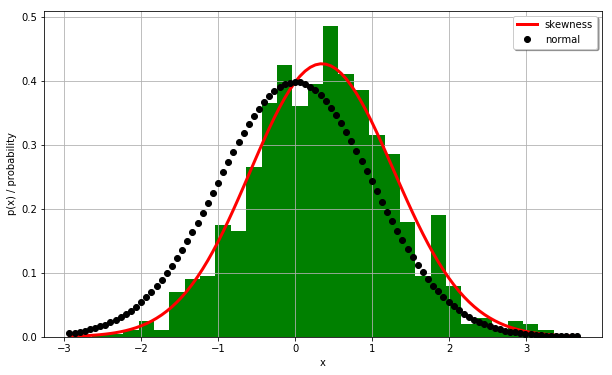

In [3]:
# Histogram of SkewNormal distribution and theoritical Pdf

#plt.figure()
fig, axs = plt.subplots()

plt.hist(data, bins=30, normed=True, color='g');

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

theor_data_skw = sts.skewnorm.pdf(x, alpha, mean, variance)
theor_data_norm = sts.norm.pdf(x, mean, variance)

axs.grid(True)
axs.plot(x, theor_data_skw, 'r', linewidth=3, label="skewness");
axs.plot(x, theor_data_norm, 'ko', linewidth=1, label="normal");

plt.ylabel('p(x) / probability')
plt.xlabel('x')
legend = axs.legend(loc='best', shadow=True)

fig.set_size_inches(10, 6, forward=True)

In [4]:
# Skew normal distribution theoreticl parameters
# https://en.wikipedia.org/wiki/Skew_normal_distribution

# Mean and variance
mean_skw = mean + variance * ( alpha / np.sqrt((1 + alpha**2)) ) * ( np.sqrt(2/np.pi) )
variance_skw = variance**2 * ( 1 - (2/np.pi) * ( alpha / np.sqrt(1 + alpha**2) )**2  )

In [5]:
# function
def selective_mean(data, size):
    '''
    function for creating graphics and histogram of selective means
    need libriaries: numpy, scipy.stats
    data -> data_set[n]
    size -> size of elementary data set -> sizes[n]
    '''
    global variance_skw
    global mean_skw
        
    samples_array = np.array([])
    # sampling selective mean
    for sample in data:
        mean_sample = sum(sample) / size
        samples_array = np.append(samples_array, mean_sample)

    # Variance and sigma for normal distribution
    variance_norm = variance_skw / size
    sigma_norm = np.sqrt(variance_norm)

    # Normal distribution with skewnormal parametrs
    norm_distr = sts.norm(mean_skw, sigma_norm)
    x = np.linspace(-1, 2, 100)
    norm_pdf = norm_distr.pdf(x)

    # Gpraphics
    fig, axs = plt.subplots()
    axs.grid(True)

    axs.plot(x, norm_pdf, 'r', linewidth=3, label=f'PDF(n={size})');
    plt.hist(samples_array, bins = 30, normed=True);

    plt.ylabel('number of samples')
    plt.xlabel('x')
    plt.legend(loc='best')

    fig.set_size_inches(10, 6, forward=True)

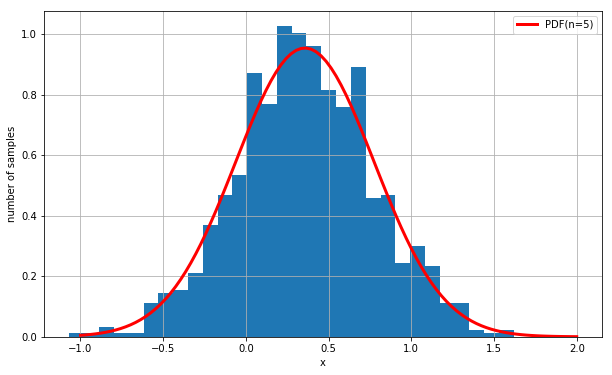

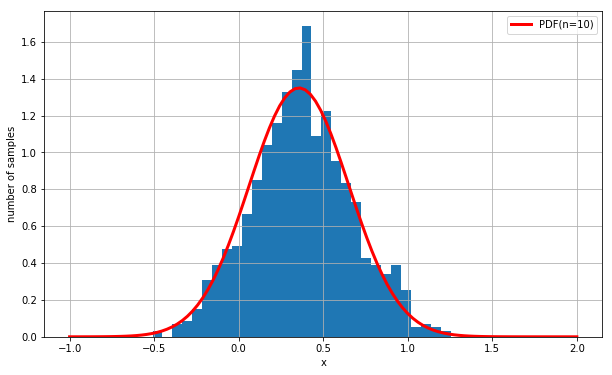

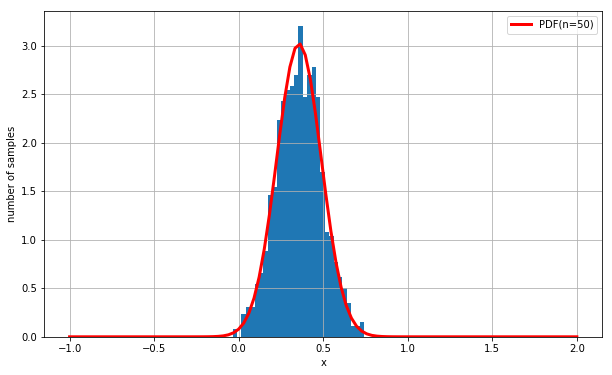

In [6]:
# Output graphics
[selective_mean(data_set[sample_array], sizes[sample_array]) for sample_array in range(3)];

In [7]:
print('As result we got an increase in the accuracy of the approximation of the sample means of continuous random\
variable described by SkewnessNormal distribution')

As result we got an increase in the accuracy of the approximation of the sample means of continuous randomvariable described by SkewnessNormal distribution
